In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import mne
import scipy
from scipy import stats
from mne.preprocessing import ICA
from mne.preprocessing.ica import corrmap
from mne.time_frequency import psd_welch
import sys
import pickle

#Create Raw file
def CreateRaw(data):
    ch_names = ['F3','F4','cp5','cp6']
    ch_types = ['eeg'] * len(ch_names)
    sfreq=200
    montage = 'standard_1020'
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types,montage=montage, verbose=False)
    raw = mne.io.RawArray(data, info, verbose=False)
    return(raw)

def CreateRaw2(data):
    ch_names = ['F3','F4','cp5']
    ch_types = ['eeg'] * len(ch_names)
    sfreq=200
    montage = 'standard_1020'
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types,montage=montage, verbose=False)
    raw = mne.io.RawArray(data, info, verbose=False)
    return(raw)


def RawToEpochs(raw,dec):
    events = mne.make_fixed_length_events(raw, id=1, duration=dec)
    epochs = mne.Epochs(raw, events,tmin=0, tmax=5, reject_by_annotation=True, detrend=0, preload=True)
    return(epochs)

def RawToEpochs2(raw,m,dec):
    events = mne.make_fixed_length_events(raw, id=1, duration=dec)
    epochs = mne.Epochs(raw, events,tmin=0, tmax=m, reject_by_annotation=True, detrend=0, preload=True)
    return(epochs)

def RawToEpochs2_picks(raw,m,dec, picks):
    events = mne.make_fixed_length_events(raw, id=1, duration=dec)
    epochs = mne.Epochs(raw, events,tmin=0, tmax=m, picks = picks, reject_by_annotation=True, detrend=0, preload=True)
    return(epochs)




## Ouvre le fichier sur lequel on veut travailler

In [6]:
os.listdir("C:\\Users\\zeta\\documents\\EEG_polysomno\\PSG_tamtin_nox")
%matplotlib qt
os.chdir("C:\\Users\\zeta\\documents\\EEG_polysomno\\PSG_tamtin_nox")

filename="1SA14_nuit_hab.edf"

RAW= mne.io.read_raw_edf(filename, preload=True)
print(RAW.info["ch_names"])

Extracting EDF parameters from C:\Users\zeta\documents\EEG_polysomno\PSG_tamtin_nox\1SA14_nuit_hab.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7269999  =      0.000 ... 29079.996 secs...


<ipython-input-6-11e5060a32a3>:7: RuntimeWarning: 7 channel names are too long, have been truncated to 15 characters:
['Inductance Abdom', 'Inductance Thora', 'Intensit? lumine', 'Jambe droite Imp', 'Jambe gauche Imp', 'Tension (aliment', 'Tension (Bluetoo']
  RAW= mne.io.read_raw_edf(filename, preload=True)


['1', '1 Impedance', '1-2', '1-F', '2', '2 Impedance', '2-F', 'Abdomen', 'Abdomen CaL', 'Activity', 'X Axis', 'Y Axis', 'Z Axis', 'C3', 'C3 Impedance', 'C3-M2', 'C4', 'C4 Impedance', 'C4-M1', 'E1', 'E1 Impedance', 'E1-M2', 'E2', 'E2 Impedance', 'E2-M1', 'ECG', 'ECG Impedance', 'F', 'F Impedance', 'F3', 'F3 Impedance', 'F3-M2', 'F4', 'F4 Impedance', 'F4-M1', 'Airflow', 'RIP Flow Cal', 'RIP Flow', 'Heart Rate', 'Inductance Abdo', 'Inductance Thor', 'Light', 'Intensit? lumin', 'Right Leg', 'Jambe droite Im', 'Left Leg', 'Jambe gauche Im', 'K', 'Flow Limitation', 'M1', 'M1 Impedance', 'M1M2', 'M2', 'M2 Impedance', 'Elevation', 'O1', 'O1 Impedance', 'O1-M2', 'O2', 'O2 Impedance', 'O2-M1', 'RIP-Phase', 'PosAngle', 'Nasal Pressure', 'Snoring', 'RIP Sum Cal', 'RIP Sum', 'Tension (alimen', 'Tension (Blueto', 'Tension (pile)', 'Thermistance', 'Thorax', 'Volume audio', 'Audio Volume dB']


## Selectionne les channels d'intérêt (les mâchoires) + fait un filtrage

['1 Impedance', '2 Impedance', 'F Impedance']
15
['1', '1 Impedance', '1-2', '1-F', '2', '2 Impedance', '2-F', 'Abdomen', 'Abdomen CaL', 'Activity', 'X Axis', 'Y Axis', 'Z Axis', 'C3', 'C3 Impedance', 'C3-M2', 'C4', 'C4 Impedance', 'C4-M1', 'E1', 'E1 Impedance', 'E1-M2', 'E2', 'E2 Impedance', 'E2-M1', 'ECG', 'ECG Impedance', 'F', 'F Impedance', 'F3', 'F3 Impedance', 'F3-M2', 'F4', 'F4 Impedance', 'F4-M1', 'Airflow', 'RIP Flow Cal', 'RIP Flow', 'Heart Rate', 'Inductance Abdo', 'Inductance Thor', 'Light', 'Intensit? lumin', 'Right Leg', 'Jambe droite Im', 'Left Leg', 'Jambe gauche Im', 'K', 'Flow Limitation', 'M1', 'M1 Impedance', 'M1M2', 'M2', 'M2 Impedance', 'Elevation', 'O1', 'O1 Impedance', 'O1-M2', 'O2', 'O2 Impedance', 'O2-M1', 'RIP-Phase', 'PosAngle', 'Nasal Pressure', 'Snoring', 'RIP Sum Cal', 'RIP Sum', 'Tension (alimen', 'Tension (Blueto', 'Tension (pile)', 'Thermistance', 'Thorax', 'Volume audio', 'Audio Volume dB']
Filtering raw data in 1 contiguous segment
Setting up band-pa

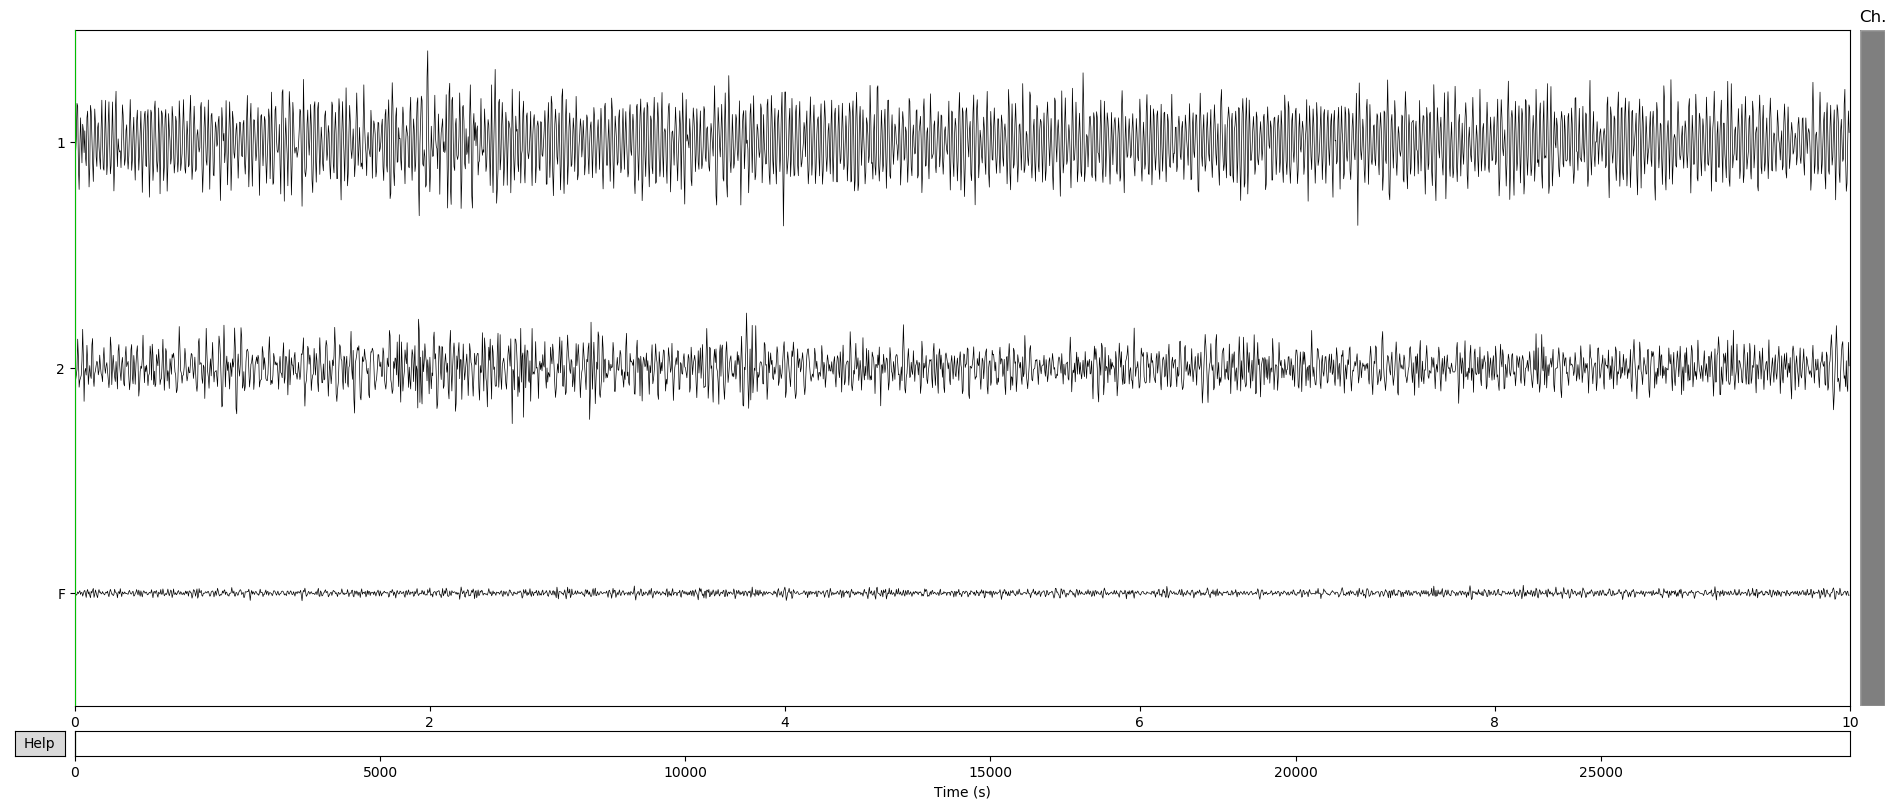

In [7]:
import copy
RAW_c=RAW.copy()
li=[1,5,28] #impedance channels machoire
chan=RAW_c.info["ch_names"]
li_imp=[chan[1],chan[5],chan[28]]
print(li_imp)
print(chan.index("C3-M2"))

def all_chan_but(lis, chan):
    ret=[]
    for val in chan:
        if not lis.__contains__(val):
            ret.append(val)
    return ret

suppr_li_imp =all_chan_but(li_imp, chan)
get_c3=all_chan_but(["1","2","F"], chan)
#get_c3=all_chan_but(["1-2","1-F","2-F"], chan)
li= RAW_c.info["ch_names"]
print(li)
RAW_c.drop_channels(get_c3)
#RAW.drop_channels(["Activity","X Axis","Y Axis","Z Axis", "Heart Rate","PosAngle", "Audio Volume dB", "1","1-2",
#                  "1-F","2","2-F","M2 Impedance"])

RAW_c = RAW_c.filter(20., 99., n_jobs=1, fir_design='firwin', filter_length='auto', phase='zero-double')
data = RAW_c.get_data()
RAW_c.plot(scalings = 'auto', n_channels = 4)

In [9]:
%matplotlib inline

## Calcule l'enveloppe de Hilbert puis prend sa valeur absolue

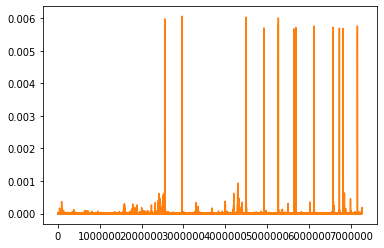

In [10]:
from scipy.signal import hilbert, chirp
#On récupère l'enveloppe du signal d'une des channels

plt.figure()
plt.plot(data[0][:10000])
env=hilbert(data[0])
amp_env = np.abs(env)
plt.plot(amp_env)

## Convertit en dataframe pour faire une rolling_mean

In [11]:
import pandas as pd
#On calcule la moyenne glissante de l'enveloppe obtenue sur 100 points
df = pd.DataFrame(amp_env,columns=['a_e'])
meany=df.a_e.rolling(window=100).mean()
meany=meany[99:]

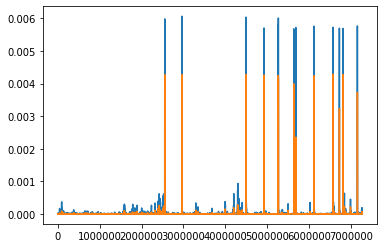

In [18]:
#plt.plot(df.a_e)
plt.figure()
plt.plot(amp_env)
plt.plot(meany)


## Calcule le seuil à partir d'une valeur donnée:

In [15]:
#seuil de détection de burst placé au 99eme percentile 
#de la distribution de la moyenne glissante, divisé par 5 pour faire les 20%
thr=(np.percentile(meany, 99)/5)
print(thr)


li_me=meany.values.tolist()
li_events=[]
li_times=[]
flag=0
deb=0
for i in range(len(li_me)-1):
    #print(meany[i+99])
    
    if li_me[i]<thr:
        
        if li_me[i+1]>thr:
            
            
            deb=i+99
            
    if li_me[i]>thr:
        
        if li_me[i+1]<thr:
            
            fin=i+99
            li_events.append([deb,fin])
            li_times.append((fin-deb)/200)
    
#Detection des évenements toniques: l_times contient leur durée en secondes, 
#li_events les instants de début et de fin du burst
    
#print(li_times)
li_tonic=[]
for i in range(len(li_times)):
    if (li_times[i]>2):
        li_tonic.append([li_events[i],li_times[i]])
        
print(li_tonic)

print(len(li_me)/(200*60*60))
print(len(li_tonic)/6.9)

5.37592257865269e-06
[[[14684, 15467], 3.915], [[42527, 43029], 2.51], [[82435, 82914], 2.395], [[90594, 92223], 8.145], [[92275, 97050], 23.875], [[97080, 98881], 9.005], [[100210, 101508], 6.49], [[102446, 104514], 10.34], [[108169, 109924], 8.775], [[109961, 112036], 10.375], [[115319, 118012], 13.465], [[138328, 139873], 7.725], [[337647, 338585], 4.69], [[376578, 380794], 21.08], [[384591, 385200], 3.045], [[650280, 651637], 6.785], [[651841, 653082], 6.205], [[700891, 701622], 3.655], [[804716, 805126], 2.05], [[819359, 820105], 3.73], [[821586, 823827], 11.205], [[1573920, 1576969], 15.245], [[1578366, 1579060], 3.47], [[1580510, 1582047], 7.685], [[1589898, 1591756], 9.29], [[1592262, 1594628], 11.83], [[1605962, 1607299], 6.685], [[1626516, 1627005], 2.445], [[1731623, 1732133], 2.55], [[1732173, 1732703], 2.65], [[1732758, 1733175], 2.085], [[1777329, 1777914], 2.925], [[1778229, 1779543], 6.57], [[1785238, 1786288], 5.25], [[1788125, 1798241], 50.58], [[1798602, 1799353], 3.

In [19]:
#détection grossière des bursts phasiques
li_phasic=[]
for i in range(len(li_times)):
    if (li_times[i]>0.25):
            li_phasic.append(li_events[i])            

In [20]:
#tri pour n'inlcure que les événements phasiques qui ont 3 bursts rapprochés
l_p=[]
hel=[]
for i in range(len(li_phasic)-2):
    if (li_phasic[i+1][0]-li_phasic[i][1])<600:
        if (li_phasic[i+2][0]-li_phasic[i+1][1])<600:
            l_p.append([li_phasic[i][0],li_phasic[i+2][1]])
            hel.append(1)
    else:
        hel.append(0)

In [21]:
# nombre d'évenement phasiques par heure
print((len(l_p))/6.9)

38.55072463768116


In [22]:
#repartition au cours de la nuit des épisodes de bruxisme
plt.plot(hel)